In [45]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
#!pip install odfpy

In [23]:
zf = ZipFile('data\DTB_2020_v2.zip')
df_loc = pd.read_excel(zf.open('RELATORIO_DTB_BRASIL_MUNICIPIO.ods'),engine='odf')
df = pd.read_csv("./data/PAM.zip", encoding="UTF-8", sep=";", decimal=",")
df.head()

,codigo_municipio,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_plantio_colheita
0,1,1990,53152446.0,50514696.0,NaN,1.722709e+09,NaN,0.9503738736689559
1,1,1991,51753078.0,50643873.0,NaN,8.740094e+09,NaN,0.9785673617325717
2,1,1992,52273579.0,50714599.0,NaN,1.037775e+11,NaN,0.9701765207237867
3,1,1993,49226752.0,46629302.0,NaN,NaN,2.111804e+09,0.947234991250286
4,1,1994,52815030.0,51354033.0,27500582.0,NaN,NaN,0.9723374766614731


<AxesSubplot:title={'center':'Efficiency 2000'}, ylabel='Frequency'>

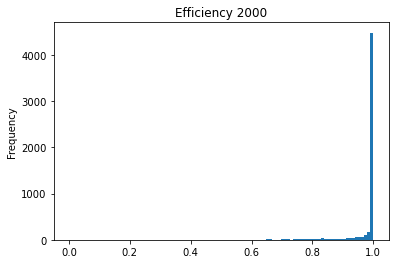

In [54]:
df.dropna(subset=['razao_plantio_colheita'],inplace=True)
year = 2000
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

<AxesSubplot:title={'center':'Efficiency 2010'}, ylabel='Frequency'>

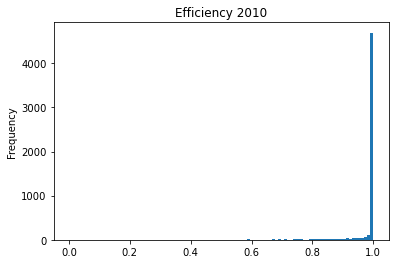

In [55]:
year = 2010
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

<AxesSubplot:title={'center':'Efficiency 2019'}, ylabel='Frequency'>

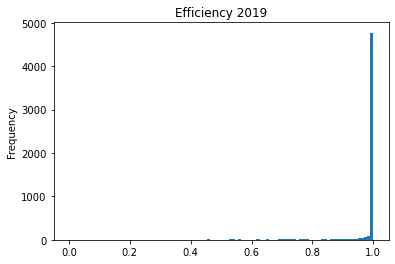

In [56]:
year = 2019
pd.to_numeric(df[df['ano'] == year]['razao_plantio_colheita']).plot(kind='hist',bins=np.linspace(0,1,100),title=f'Efficiency {year}')

In [18]:
df_loc.drop(columns=['UF',
            'Região Geográfica Intermediária',
            'Nome Região Geográfica Intermediária',
            'Região Geográfica Imediata',
            'Nome Região Geográfica Imediata',
            'Mesorregião Geográfica',
            'Nome_Mesorregião',
            'Microrregião Geográfica',
            'Nome_Microrregião',
            'Município'],
            inplace = True)
df_loc.head()

,Nome_UF,Código Município Completo,Nome_Município
0,Rondônia,1100015,Alta Floresta D'Oeste
1,Rondônia,1100379,Alto Alegre dos Parecis
2,Rondônia,1100403,Alto Paraíso
3,Rondônia,1100346,Alvorada D'Oeste
4,Rondônia,1100023,Ariquemes


In [19]:
df_complete = df_loc.merge(df,left_on='Código Município Completo',right_on='codigo_municipio',how='inner')
df_complete.drop(columns=['Código Município Completo'],inplace=True)
df_complete.head()

,Nome_UF,Nome_Município,codigo_municipio,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_plantio_colheita
0,Rondônia,Alta Floresta D'Oeste,1100015,1990,22275.0,22275.0,NaN,462257.0,NaN,1.0
1,Rondônia,Alta Floresta D'Oeste,1100015,1991,23005.0,23005.0,NaN,2423889.0,NaN,1.0
2,Rondônia,Alta Floresta D'Oeste,1100015,1992,36020.0,36020.0,NaN,41232411.0,NaN,1.0
3,Rondônia,Alta Floresta D'Oeste,1100015,1993,38360.0,38360.0,NaN,NaN,1079677.0,1.0
4,Rondônia,Alta Floresta D'Oeste,1100015,1994,42899.0,42899.0,14864.0,NaN,NaN,1.0


In [ ]:
df_fin = pd.read_csv('data\desembolsos-mensais.zip', encoding="UTF-8", sep=";", decimal=",")
df_fin.head()

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,2.475354e+10
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.889998e+09
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.409998e+09
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,7.271079e+09
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,5.699997e+09


In [92]:
df_agro = df_fin[(df_fin['setor_bndes']=='AGROPECUÁRIA') & (df_fin['ano'] > 1990) & (df_fin['ano'] > 2019)]
desembolso_por_municipio = df_agro[["municipio", "uf", "municipio_codigo", "desembolsos_reais"]].groupby(["municipio"]).agg(uf=("uf", "first"), municipio_codigo=("municipio_codigo", "first"), count=("desembolsos_reais", "count"), sum=("desembolsos_reais", "sum")).reset_index()
desembolso_por_municipio.head(20)


,municipio,uf,municipio_codigo,count,sum
0,ABADIA DOS DOURADOS,MINAS GERAIS,3100104,12,2781966.39
1,ABADIANIA,GOIAS,5200100,3,580470.55
2,ABAETE,MINAS GERAIS,3100203,12,1548384.30
3,ABATIA,PARANA,4100103,8,1022840.57
4,ABDON BATISTA,SANTA CATARINA,4200051,11,885462.47
5,ABEL FIGUEIREDO,PARA,1500131,4,1911700.00
6,ABELARDO LUZ,SANTA CATARINA,4200101,64,23948018.07
7,ABRE CAMPO,MINAS GERAIS,3100302,11,2635514.00
8,ABREULANDIA,TOCANTINS,1700251,4,2163585.21
9,ACAILANDIA,MARANHAO,2100055,25,14656466.94


In [96]:
df_delta = df_complete.drop(columns=['valor_reais','valor_cruzeiros','valor_cruzeiros_reais'])
df_delta = df_delta[(df_delta['ano'] == 2000) | (df_delta['ano'] == 2019)].reset_index(drop=True)
df_delta.head()

,Nome_UF,Nome_Município,codigo_municipio,ano,area_plantada,area_colhida,razao_plantio_colheita
0,Rondônia,Alta Floresta D'Oeste,1100015,2000,29841.0,29841.0,1.0
1,Rondônia,Alta Floresta D'Oeste,1100015,2019,17787.0,17778.0,0.9994940124810254
2,Rondônia,Alto Alegre dos Parecis,1100379,2000,15840.0,15835.0,0.9996843434343434
3,Rondônia,Alto Alegre dos Parecis,1100379,2019,23100.0,23089.0,0.9995238095238095
4,Rondônia,Alto Paraíso,1100403,2000,14050.0,14050.0,1.0


In [97]:
df_delta = df_delta.pivot(index = ['Nome_UF','Nome_Município','codigo_municipio'],columns='ano',values = ['area_plantada','area_colhida','razao_plantio_colheita']).reset_index()
df_delta.head()

Nome_UF Nome_Município codigo_municipio area_plantada       area_colhida  \
ano                                                  2000  2019         2000   
0      Acre     Acrelândia          1200013          4236  4358         4236   
1      Acre   Assis Brasil          1200054          1205  1739         1205   
2      Acre      Brasiléia          1200104         10349  3413        10349   
3      Acre         Bujari          1200138          2057  3254         2057   
4      Acre       Capixaba          1200179          2964  4323         2964   

          razao_plantio_colheita                      
ano  2019                   2000                2019  
0    3875                    1.0  0.8891693437356586  
1    1715                    1.0  0.9861989649223691  
2    3353                    1.0   0.982420158218576  
3    3050                    1.0  0.9373079287031346  
4    4201                    1.0  0.9717788572750404

In [98]:
df_delta['variacao_razao_plantio_colheita'] = df_delta['razao_plantio_colheita']['2019'] - df_delta['razao_plantio_colheita']['2000']
df_delta.head()

KeyError: '2019'

In [ ]:
df_delta['variacao_razao_plantio_colheita'].head()